In [1]:
import pandas as pd

# Load our data as df_schmidt, and keep only what we need.
df_schmidt = pd.read_csv("algo-smrt_mask-16_pby-wellid_sby-wellid_vs-hcpniftismoothgrandmeansim_gene-trios_157.csv")
df_schmidt = df_schmidt[['rank', 'entrez_id']]

# Load Gandal, et al's data as df_gandal, and keep only what we need.
xl = pd.ExcelFile("aad6469_Gandal_SM_Data-Table-S1.xlsx")
df_gandal = pd.read_excel(xl, "Microarray MetaAnalysis DGE")
df_gandal = df_gandal[['entrezgene', 'SCZ.beta_log2FC']]
print("The raw Gandal set has {:,} rows.".format(len(df_gandal)))
df_gandal = df_gandal.dropna(axis=0, how="any")

print("After dropping nas, it has {:,}.".format(len(df_gandal)))


The raw Gandal set has 26,648 rows.
After dropping nas, it has 11,929.


In [2]:
# Clean Gandal up a little, to keep code easy to read.
df_gandal['entrez_id'] = df_gandal['entrezgene'].apply(int)
df_gandal['scz_fc'] = df_gandal['SCZ.beta_log2FC']

# Gandal needs a ranking, too, so sort by fold-change and store the order
# Because Gandal has multiple fold-change values per entrez_id, we must also average over entrez_id
df_gandal = df_gandal.groupby('entrez_id').mean().sort_values(by='scz_fc', ascending=False)
df_gandal['rank'] = range(1, len(df_gandal) + 1)
df_gandal = df_gandal.reset_index()[['entrez_id', 'scz_fc', 'rank']]

print("After averaging over entrez_ids, it has {:,} values.".format(len(df_gandal)))


After averaging over entrez_ids, it has 11,887 values.


In [3]:
print("Schmidt's list has {:,} unique genes; Gandal's has {:,}. {:,} overlap between them.".format(
    len(set(df_schmidt['entrez_id'])), len(set(df_gandal['entrez_id'])),
    len(set(df_schmidt['entrez_id']).intersection(set(df_gandal['entrez_id'])))
))

Schmidt's list has 15,745 unique genes; Gandal's has 11,887. 9,712 overlap between them.


In [4]:
from scipy.stats import kendalltau

# Only compare genes that are in both lists, and we're comparing 'rank', so don't need to maintain rank order in the list.
common_genes = sorted(list(
    set(df_schmidt['entrez_id']).intersection(set(df_gandal['entrez_id']))
))
schmidt_ranks = list(df_schmidt.sort_values(by='entrez_id').loc[df_schmidt['entrez_id'].isin(common_genes), 'rank'])
gandal_ranks = list(df_gandal.sort_values(by='entrez_id').loc[df_gandal['entrez_id'].isin(common_genes), 'rank'])
tau, p = kendalltau(schmidt_ranks, gandal_ranks)

print("Kendall tau between Schmidt and Gandal ranked lists is {:0.3f} (p = {:0.5f})".format(
    tau, p
))

Kendall tau between Schmidt and Gandal ranked lists is -0.029 (p = 0.00002)


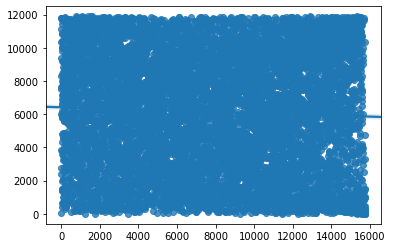

In [6]:
import seaborn as sns

sns.regplot(schmidt_ranks, gandal_ranks)